In [16]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
sns.set(rc={'figure.figsize':(20,12)})

In [2]:
df = pd.read_excel("RBRTE Data.xlsx")

In [3]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [4]:
df['Date']= pd.to_datetime(df['Date'])
df['Price']= pd.to_numeric(df['Price'])
df=df.set_index(df['Date'])

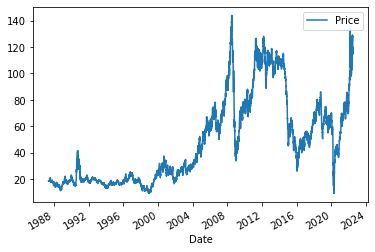

In [5]:
df.plot(x="Date",y='Price');

In [6]:
f = Forecaster(y=df['Price'],current_dates=df['Date'])

In [7]:
f

Forecaster(
    DateStartActuals=1987-05-20T00:00:00.000000000
    DateEndActuals=2022-06-27T00:00:00.000000000
    Freq=None
    N_actuals=8911
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

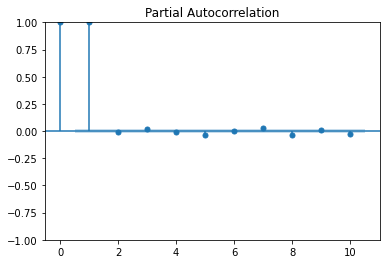

In [8]:
f.plot_pacf(lags=10)
plt.show()

In [9]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [10]:
stat

-1.6265145450359364

In [11]:
pval

0.46931566020775023

In [12]:
f.set_test_length(100)       # 1. 12 observations to test the results
f.generate_future_dates(100) # 2. 12 future points to forecast
f.set_estimator('lstm') 

276/276 [==============================] - 0s 910us/step


<Figure size 1440x1440 with 0 Axes>

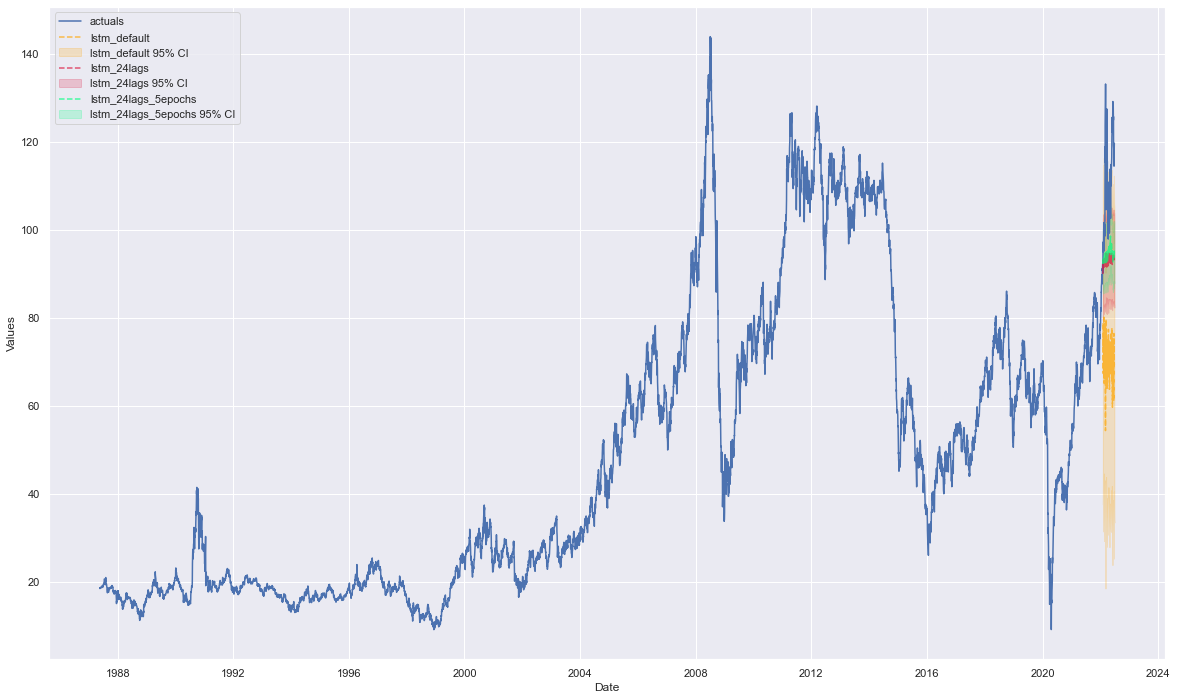

<Figure size 1440x1440 with 0 Axes>

In [17]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)
plt.figure(figsize=(20,20))

275/275 [==============================] - 1s 3ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

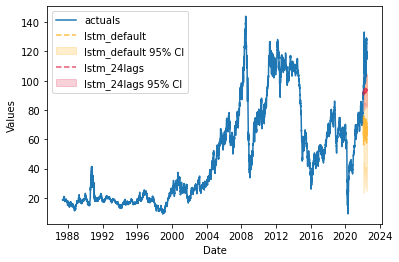

In [14]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
218/218 [==============================] - 5s 13ms/step - loss: 0.1342 - val_loss: 0.0249
Epoch 2/5
218/218 [==============================] - 2s 10ms/step - loss: 0.0474 - val_loss: 0.0222
Epoch 3/5
218/218 [==============================] - 2s 10ms/step - loss: 0.0460 - val_loss: 0.0212
Epoch 4/5
218/218 [==============================] - 2s 10ms/step - loss: 0.0459 - val_loss: 0.0208
Epoch 5/5
1/1 [==============================] - 0s 461ms/step
Epoch 1/5
220/220 [==============================] - 4s 11ms/step - loss: 0.1370 - val_loss: 0.0307
Epoch 2/5
220/220 [==============================] - 2s 9ms/step - loss: 0.0511 - val_loss: 0.0201
Epoch 3/5
220/220 [==============================] - 2s 10ms/step - loss: 0.0488 - val_loss: 0.0192
Epoch 4/5
220/220 [==============================] - 2s 9ms/step - loss: 0.0479 - val_loss: 0.0189
Epoch 5/5
275/275 [==============================] - 1s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

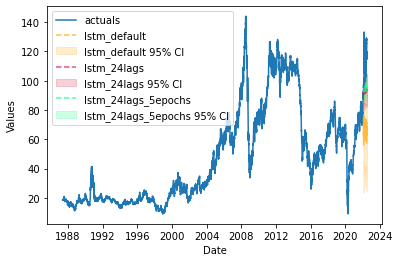

In [15]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)

f.plot_test_set(ci=True)